# Seaborn을 사용한 데이터 분포 시각화

In [2]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline
# %matplotlib nbagg
    
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]


# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

# #  display two pandas tables side by side
# from IPython.display import display, HTML
# CSS = """
# .output {
#     flex-direction: row;
# }
# """
# HTML('<style>{}</style>'.format(CSS))


# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# allow multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# allow image input
from IPython.display import Image

In [4]:
df = pd.read_excel("./data/IUDP학생현황.xlsx")

In [ ]:
df = pd.read_excel("./data/MUAP11기 논문지도 현황.xlsx", skiprows=2, sheet_name='Sheet1')
df = df[:19]

Seaborn을 사용한 데이터 분포 시각화

구분|연번|명령
:--|:--|:--
스타일 | set_style('darkgrid)  | 틱 스타일만 변경가능 (darkgrid, whitegrid, dark, white, 그리고 ticks 스타일 제공) 
         | set_color_codes() | 명령으로는 기본 색상을 가리키는 문자열을 바꾼다
색상 팔렛트 | color_palette() | 스타일 지정을 위한 색상 팔렛트(color palette) 지원 / 색상 팔렛트는 Matplotlib의 칼라맵(colormap)으로 사용 가능
1차원 분포 플롯 | 1차원 실수 분포 플롯 | `rugplot()`, `kdeplot()`, `distplot()`
               | 카운트 플롯 | 카테고리 값(x)별로 데이터가 얼마나 있는지 표시`countplot(x="column_name", data=dataframe)`
다차원 데이터  | 2차원 실수형 데이터 | 데이터 모두 연속적 실수값일 때 사용 `jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter<kde, reg, hex등>')` <scatterplot>
              | 다차원 실수형 데이터 | 1. 데이터프레임을 인수로 그리드(grid) 형태로 각 데이터 열의 조합에 대한 스캐터 플롯 그림 / 같은 데이터 만나는 대각선 영역엔 히스토그램: `sns.pairplot(iris)` <br><br> 2. 카테고리형 데이터가 섞여 있는 경우 hue인수에 카테고리 변수 이름을 지정: `sns.pairplot(iris, hue="species", markers=["o", "s", "D"])`
              | 2차원 카테고리 데이터| 모든 값이 카테고리값이면 heatmap: `sns.heatmap(titanic_size, cmap=sns.light_palette("gray", as_cmap=True), annot=True, fmt="d")`
              |2차원 복합 데이터| 1. x는 카테고리값, y는 실수값의 평균 및 편차 표시: `sns.barplot(x="day", y="total_bill", data=tips)` <br><br> 2. x는 카테고리값, y는 실수값의 평균 및 편차 표시 차트로, 박스는 1사분위수(Q1)와 3사분위수(Q3) / 박스 내부 가로선은 중앙값 표시: `sns.boxplot(x="day", y="total_bill", data=tips)` <br><br> 3. x는 카테고리값, y는 실수값의 평균 및 편차 표시 차트로, 세로 방향 좌우대칭의 커널 밀도 히스토그램 제공 : `sns.violinplot(x="day", y="total_bill", data=tips)`<br><br> 4. x는 카테고리값, y는 실수값의 평균 및 편차 표시 차트로, 모든 데이터를 점으로 표시하고, Jitter=True 로 설정 시 가로축 상 점 위치를 무작위 변동해 겹침 방지 : `sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)`<br><br> 5. x는 카테고리값, y는 실수값의 평균 및 편차 표시 차트로, 모든 데이터를 점으로 표시하는 `stripplot`과 유사하며, 점 겹침 방지 위해 점을 옆으로 이동: `sns.swarmplot(x="day", y="total_bill", data=tips)`
다차원 복합 데이터 | 2차원 이상 고차원 데이터 분석 |  1. 카테고리 값(x) day 외 hue 인수로 카테고리 값 hue=sex 추가: `barplot`, `violinplot`, `boxplot` <br> <br> 2. 카테고리 값 변수로 2개(month,year) 를 지정하고 실수값 변화 확인가능: `heatmap`
                         | catplot | 3개 이상 카테고리 값에 의한 분포변화를 보여줌<색상(hue)과 행(row) 등을 동시 사용>: `sns.catplot(x="age", y="sex", hue="survived", row="class", data=data, kind="violin", split=True, height=2, aspect=4)`

## 스타일

`sns.set() 과 sns.set_style()`

* set 명령으로 색상, 틱 스타일 등 전반적인 플롯 스타일을 Seaborn 기본 스타일로 바꾼다. 
* set_style 명령은 틱 스타일만 바꿀 수 있다. 
* darkgrid, whitegrid, dark, white, 그리고 ticks 스타일을 제공한다.

`set_color_codes()`

* 기본 색상을 가리키는 문자열을 바꾼다. 예를 들어 set_color_codes 명령이 적용되기 이전과 이후에 red 문자열이 가리키는 실제 색상 코드는 다르다.

In [4]:
import seaborn as sns
import matplotlib as mpl
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)

`color_palette()`

* 스타일 지정을 위한 색상 팔렛트(color palette) 지원한다. 
* 색상 팔렛트는 Matplotlib의 칼라맵(colormap)으로 사용할 수도 있다.

In [ ]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [ ]:
sns.palplot(sns.color_palette("Blues"))

In [ ]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

## 1차원 분포 플롯

1차원 데이터는 
* ***실수 값***이면 히스토그램과 같은 실수 분포 플롯으로 나타내고
* ***카테고리 값***이면 카운트 플롯으로 나타낸다.

In [3]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

x = iris.petal_length.values

### 1차원 실수 분포 플롯

* 실수 분포 플롯은 ***자료의 분포를 묘사하기 위한 것***
* Matplotlib의 단순한 히스토그램과 달리 커널 밀도(kernel density) 및 러그(rug) 표시 기능 및 다차원 복합 분포 기능 등 제공
* 1차원 실수 분포 플롯 명령에는 ***rugplot, kdeplot, distplot***이 있다.

##### sns.rugplot() 명령 

```sns.rugplot(x)```

* ***러그(rug) 플롯***은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다

Text(0.5, 1.0, 'Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot')

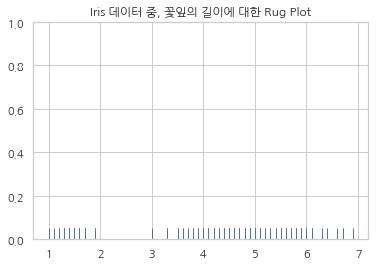

In [6]:
sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot")
plt.show()

##### sns.kdeplot() 명령 
```sns.kdeplot(x)```

* ***커널 밀도(kernel density)*** 는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법이다.

Text(0.5, 1.0, 'Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot')

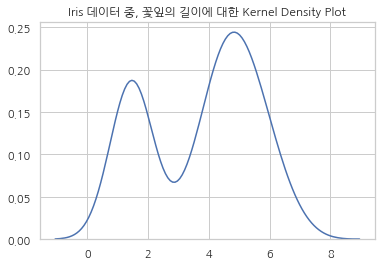

In [7]:
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

##### sns.distplot() 명령 
```sns.distplot(x, kde=True, rug=True)```

* distplot 명령은 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 hist 명령보다 많이 사용된다

Text(0.5, 1.0, 'Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot')

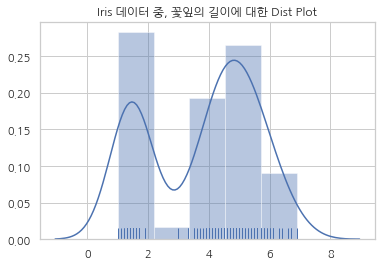

In [5]:
sns.distplot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

### 카운트 플롯

`countplot` 명령은 

* ***각 카테고리 값별로 데이터가 얼마나 있는지 표시***한다
* ***데이터프레임***에만 사용가능하다

```
countplot(x="column_name", data=dataframe)
```

`data 인수` 에는 대상이 되는 데이터프레임을,

`x 인수` 에는 데이터프레임의 열 이름 문자열을 넣는다.

Text(0.5, 1.0, '타이타닉호의 각 클래스별, 승객 수')

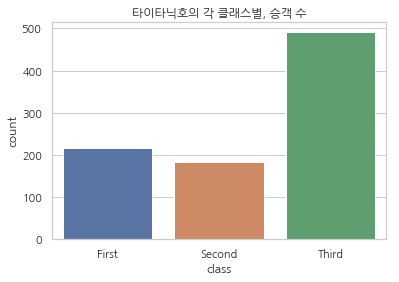

In [10]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

## 다차원 데이터

데이터 변수가 여러개인 다차원 데이터는 데이터의 종류에 따라 다음과 같은 경우가 있을 수 있다.

* 분석하고자 하는 **데이터가 모두 실수 값**인 경우
* 분석하고자 하는 **데이터가 모두 카테고리 값**인 경우
* 분석하고자 하는 **데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우**


### 2차원 실수형 데이터

* **데이터가 2차원이고 모두 연속적인 실수값**이라면 **스캐터 플롯(scatter plot)**을 사용
* 스캐터 플롯을 그리기 위해서는 Seaborn 패키지의 `jointplot` 명령 사용
* `jointplot` 명령은 스캐터 플롯뿐 아니라 차트 가장자리(margin)에 각 변수 히스토그램도 그림

* `jointplot`: http://seaborn.pydata.org/generated/seaborn.jointplot.html

* `jointplot` 명령도 데이터프레임에만 사용할 수 있다. 사용 방법은 다음과 같다.

```
jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')
```

* **data** 인수에는 대상이 되는 데이터프레임을, 
* **x** 인수에는 x 변수가 될 데이터프레임의 열 이름 문자열을, 
* **y** 인수에는 y 변수가 될 데이터프레임의 열 이름 문자열을 넣는다
* **kind**는 차트의 종류를 지정한다. e.g. `kind='scatter'`이면 스캐터 플롯이다.

Text(0.5, 1.0, '꽃받침의 길이와 넓이의 Joint Plot')

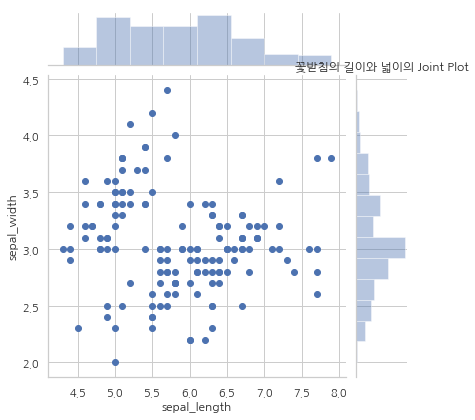

In [11]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.title("꽃받침의 길이와 넓이의 Joint Plot")
plt.show()

`kind='kde'`이면 커널 밀도 히스토그램을 그린다.

Text(0.5, 1.0, '꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot')

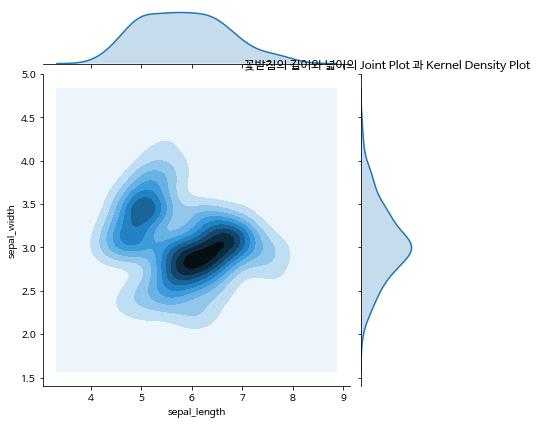

In [119]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.title("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot")
plt.show()

### 다차원 실수형 데이터

```sns.pairplot(iris)```

* 3차원 이상의 데이터에 사용
    * `pairplot`은 ****데이터프레임을 인수****로 받아 그리드(grid) 형태로 ****각 데이터 열의 조합****에 대해 ****스캐터 플롯****을 그린다. 
    * ****같은 데이터가 만나는 대각선 영역****에는 ****해당 데이터의 히스토그램****을 그린다.


* `pairplot`: http://seaborn.pydata.org/generated/seaborn.pairplot.html

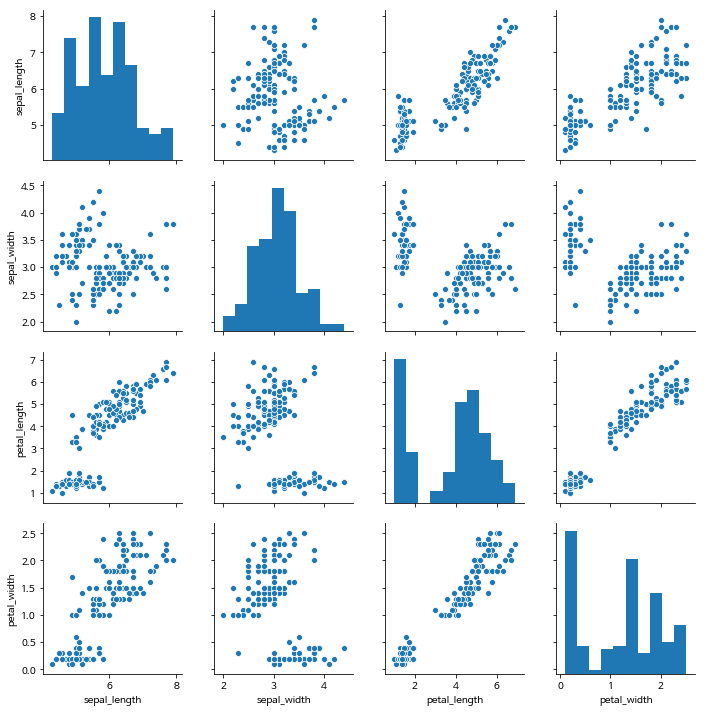

In [120]:
sns.pairplot(iris)

```sns.pairplot(iris, hue="species", markers=["o", "s", "D"])```

* ****카테고리형 데이터****가 섞여 있는 경우 ****hue인수****에 카테고리 변수 이름을 지정해 ****카테고리 값에 따라 색상을 다르게**** 할 수 있다.

Text(0.5, 1.0, 'Iris Pair Plot, Hue로 꽃의 종을 시각화')

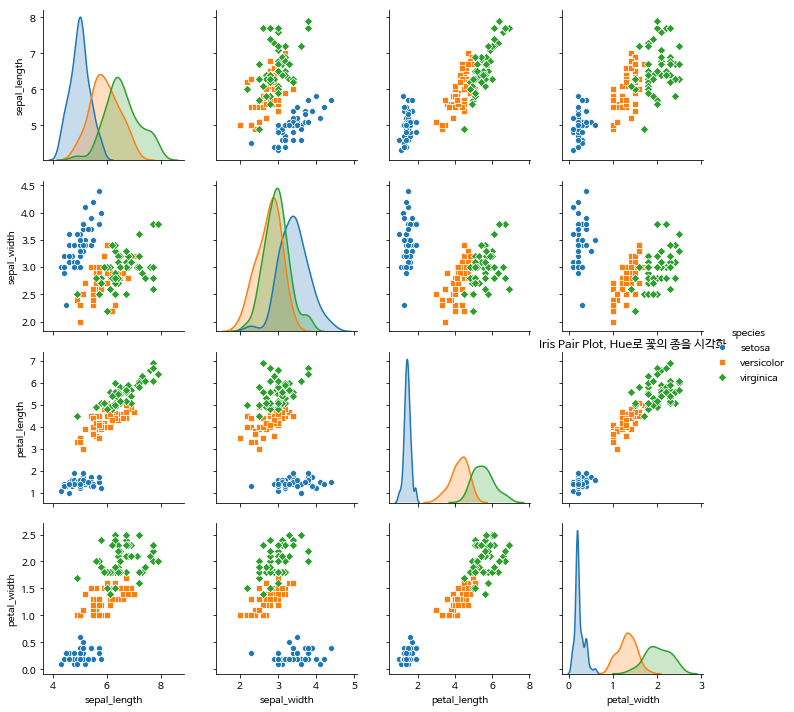

In [148]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

### 2차원 카테고리 데이터

```sns.heatmap(titanic_size, cmap=sns.light_palette("gray", as_cmap=True), annot=True, fmt="d")```

* 데이터가 2차원이고 모든 값이 카테고리  값이면  `heatmap` 명령 사용

* `heatmap`: http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [150]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


Text(0.5, 1.0, 'Heatmap')

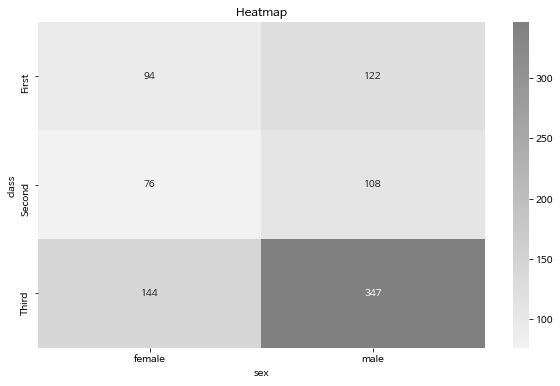

In [170]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "gray", as_cmap=True),annot=True,fmt="d")
plt.title("Heatmap")
plt.show()

### 2차원 복합 데이터

* 데이터가 2차원에 실수 값, 카테고리 값이 섞여 있을 때 사용

    * `barplot`
    * `boxplot`
    * `pointplot`
    * `violinplot`
    * `stripplot`
    * `swarmplot`

`sns.barplot(x="day", y="total_bill", data=tips)`

* ****카테고리 값(x)**** 에 따른 ****실수 값의 평균과 편차를 표시(y)**** 바 차트 생성
* ****평균**** 은 막대높이 / ****편차**** 는 에러바(error bar)로 표시 <ci인수를 None 으로 설정하면 에러바 생략>

* `barplot`: http://seaborn.pydata.org/generated/seaborn.barplot.html

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, '요일 별, 전체 팁')

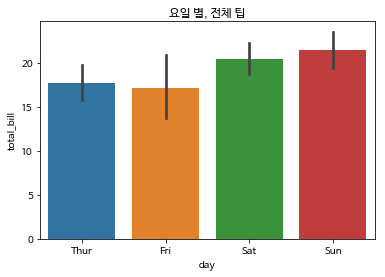

In [4]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()

* `boxplot`이 중앙값, 표준 편차 등, 분포의 간략한 특성만 보여주나
* `violinplot`, `stripplot`. `swarmplot` 등은 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여

`sns.boxplot(x="day", y="total_bill", data=tips)`

* ****카테고리 값(x)**** 에 따른 ****실수 값의 평균과 편차를 표시(y)**** 차트 생성
* ****박스****는 1사분위수(Q1)와 3사분위수(Q3)
* ****박스 내부 가로선****은 중앙값
* ****박스 외부 세로선****은 1사분위 수보다 1.5 x  `IQR ` 만큼 낮은 값과 3사분위 수보다 1.5 x  `IQR ` 만큼 높은 값의 구간 기준, 그 구간 내부의 가장 큰 데이터와 가장 작은 데이터를 잇는 선분 <br>
< `IQR(interquartile range) `: 3사분위수와 1사분수의 차이(Q3 - Q1)>
* ****박스 외부 세로선 바깥점****은 아웃라이어(outlier) <일일히 점으로 표시>

* `boxplot`: http://seaborn.pydata.org/generated/seaborn.boxplot.html

Text(0.5, 1.0, '요일 별 전체 팁의 Box Plot')

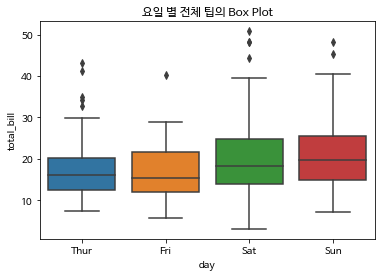

In [6]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

`sns.violinplot(x="day", y="total_bill", data=tips)`

* ****카테고리 값(x)**** 에 따른 ****실수 값의 평균과 편차를 표시(y)**** 차트 생성
* 좌우대칭 되도록 세로 방향으로 ****커널 밀도 히스토그램****을 그려줌
* `violinplot`: http://seaborn.pydata.org/generated/seaborn.violinplot.html

Text(0.5, 1.0, '요일 별 전체 팁의 Violin Plot')

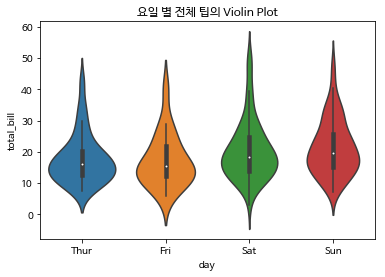

In [8]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Violin Plot")
plt.show()

`sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)`

* ****카테고리 값(x)**** 에 따른 ****실수 값의 평균과 편차를 표시(y)**** 차트 생성
* 모든 데이터를 점으로 표시
* `Jitter=True` 로 설정 시 가로축 상 점 위치 무작위 변동되어 겹침 방지
* `swarmplot`: http://seaborn.pydata.org/generated/seaborn.swarmplot.html

Text(0.5, 1.0, '요일 별 전체 팁의 Strip Plot')

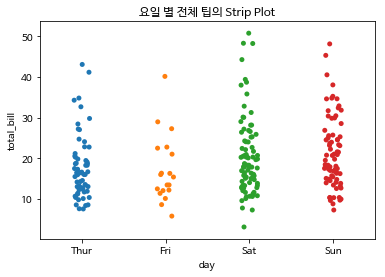

In [6]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()

`sns.swarmplot(x="day", y="total_bill", data=tips)`

* ****카테고리 값(x)**** 에 따른 ****실수 값의 평균과 편차를 표시(y)**** 차트 생성
* 모든 데이터를 점으로 표시 <`stripplot과 유사`>
* 점 겹침 방지를 위해 점을 옆으로 이동
* `swarmplot`:  http://seaborn.pydata.org/generated/seaborn.swarmplot.html

Text(0.5, 1.0, '요일 별 전체 팁의 Swarm Plot')

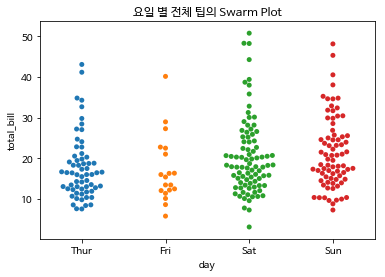

In [8]:
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Swarm Plot")
plt.show()

## 다차원 복합 데이터

### 2차원 이상 고차원 데이터 분석 

#### `barplot`,` violinplot`, `boxplot`

* `barplot`, `violinplot`, `boxplot` 은 `hue` 인수에 카테고리 값 변수  지정해, 두 카테고리 값에 대한 실수값 변화 확인 가능
 

* 아래 barplot, violinplot, boxplot은 ****카테고리 값(x) day**** 외에 hue 인수로  ****카테고리 값 sex**** 추가 

`sns.barplot(x="day", y="total_bill", hue="sex", data=tips)`

Text(0.5, 1.0, '요일 별, 성별 전체 팁의 Histogram')

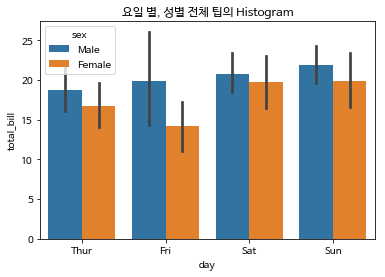

In [10]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Histogram")
plt.show()

`sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)`

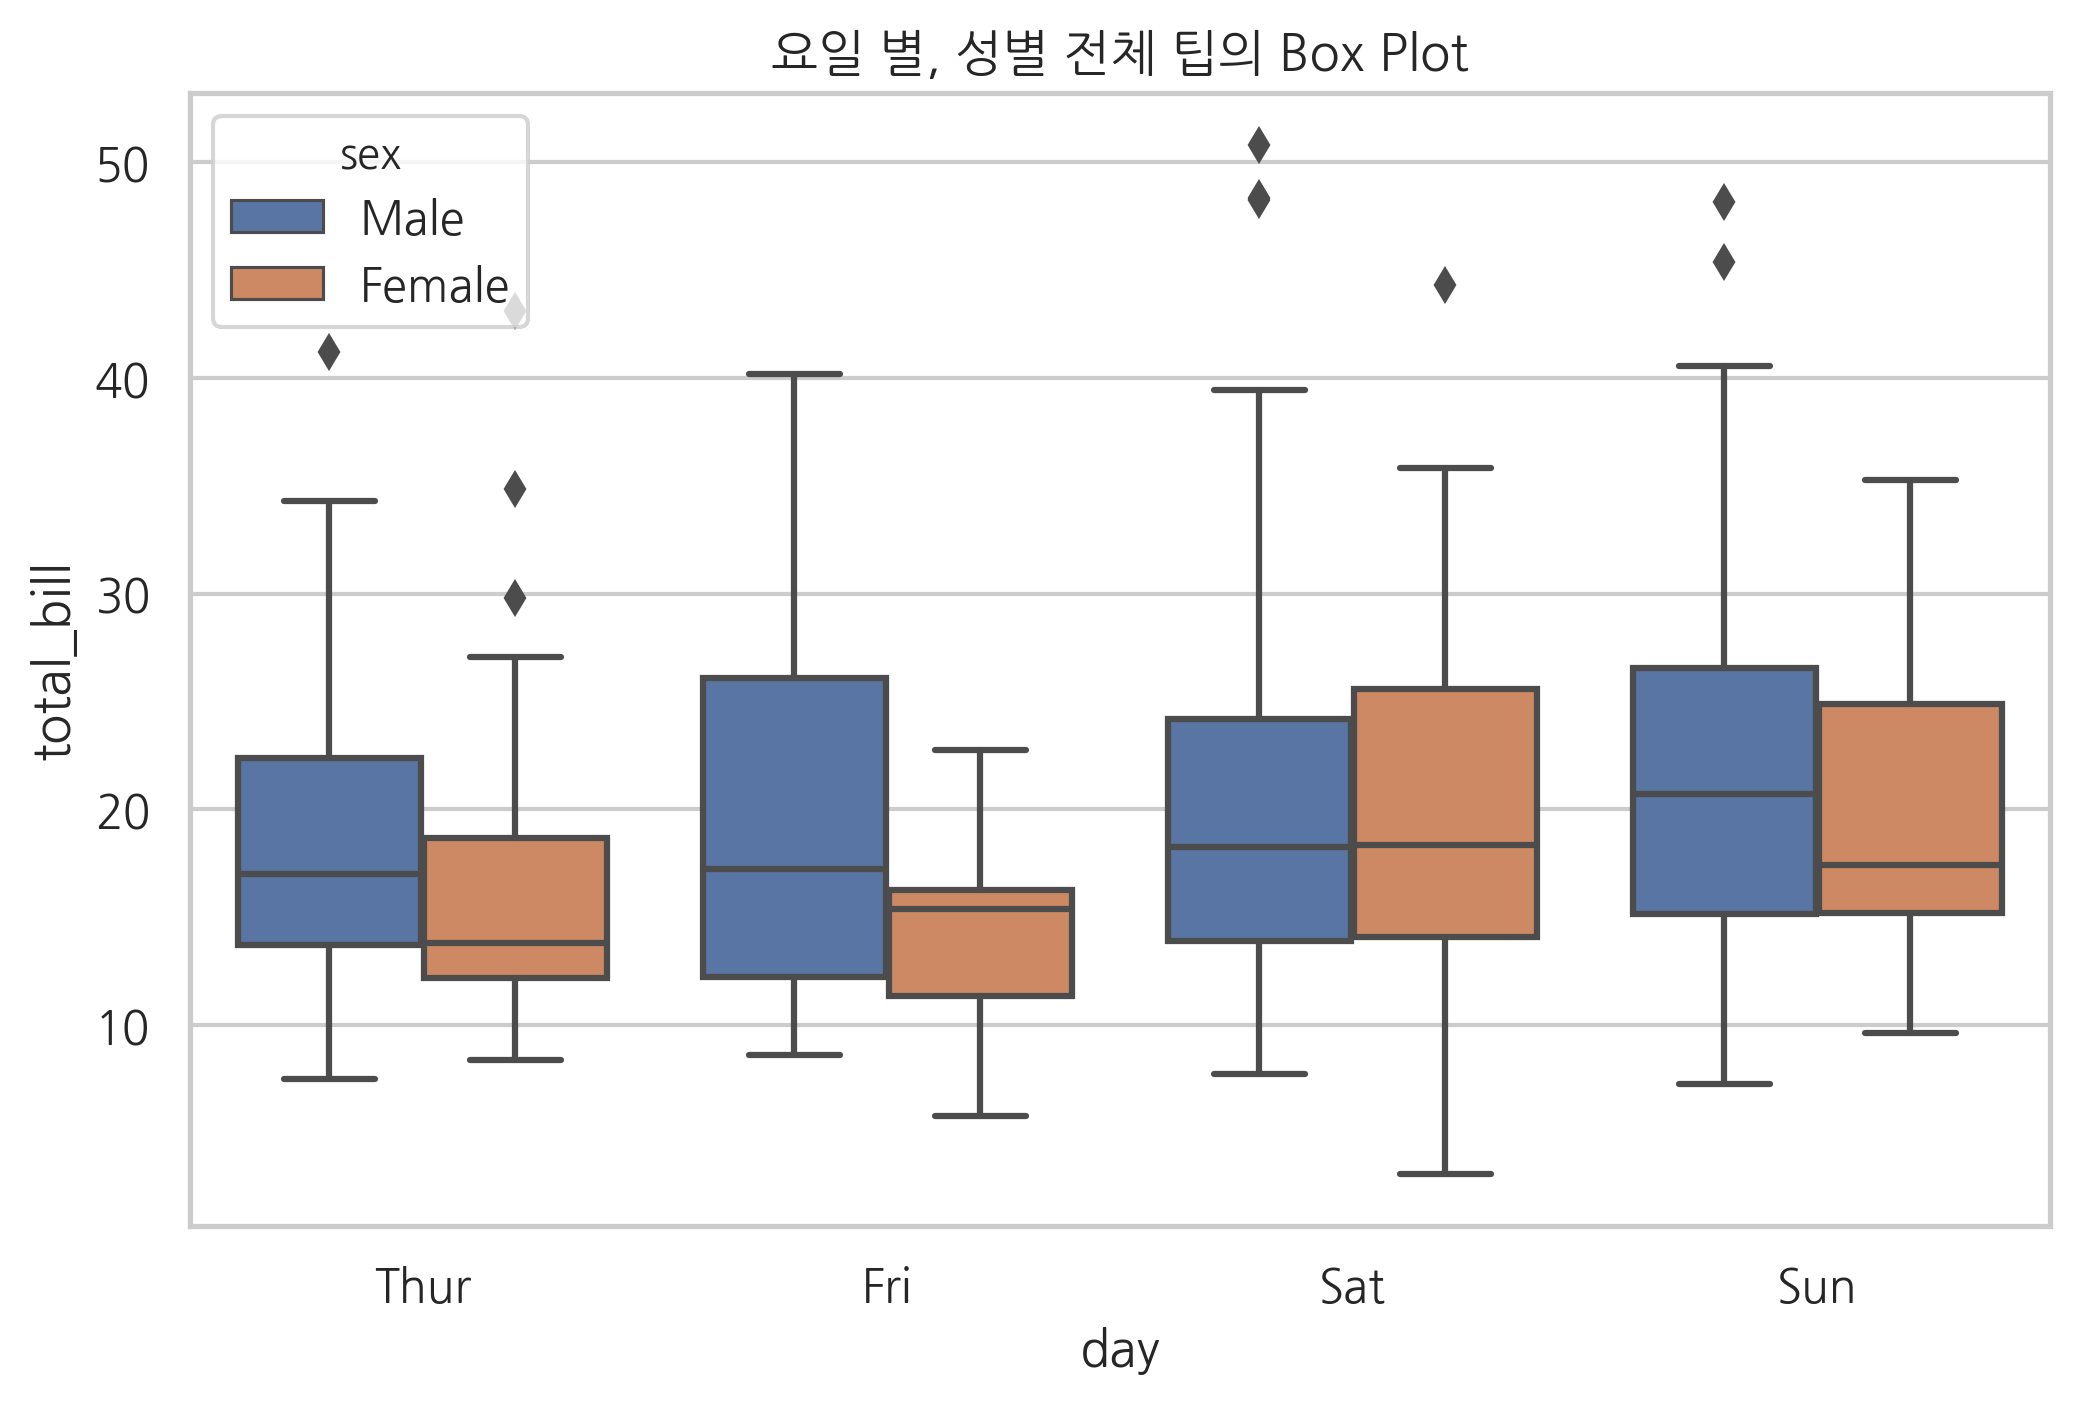

In [24]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

`sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)`

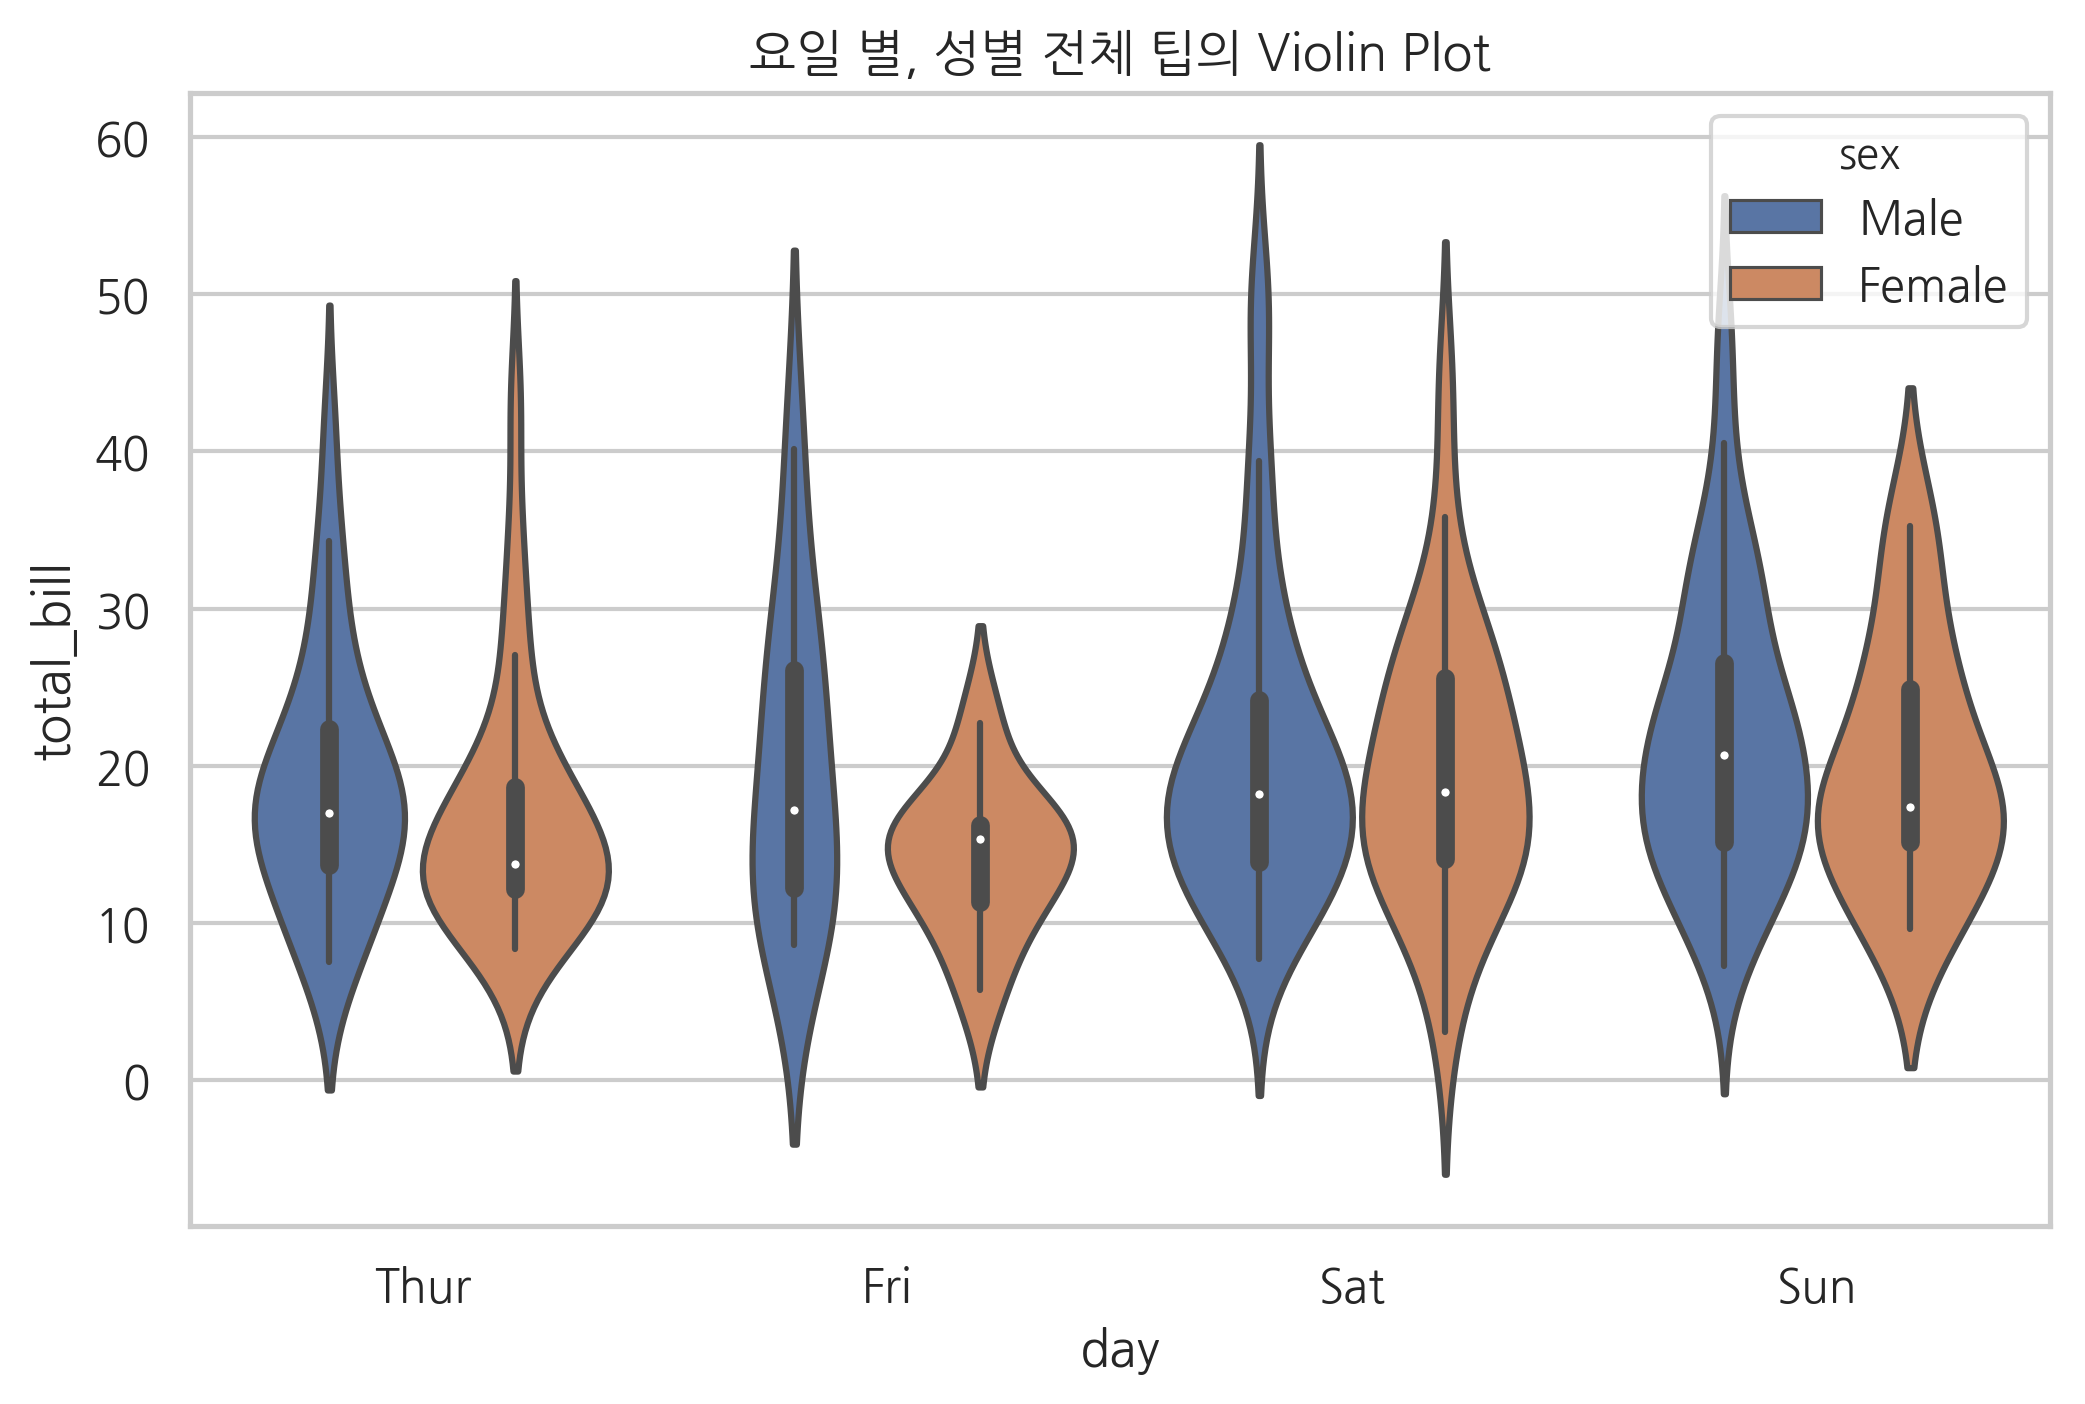

In [25]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Violin Plot")
plt.show()

`sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)`

Text(0.5, 1.0, '요일 별, 성별 전체 팁의 Strip Plot')

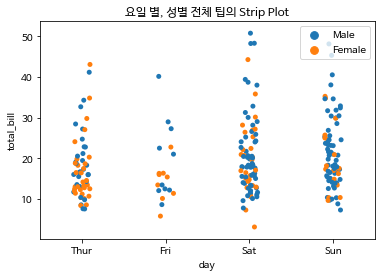

In [19]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot")
plt.legend(loc=1)
plt.show()

`sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)`

Text(0.5, 1.0, '요일 별, 성별 전체 팁의 Swarm Plot')

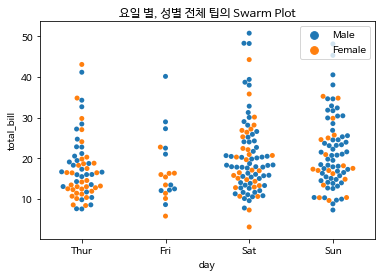

In [20]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Swarm Plot")
plt.legend(loc=1)
plt.show()

#### `heatmap`

`sns.heatmap(flights_pivot("month, "year", "passengers"), annot=True, fmt="d", linewidths=1)`

`heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)`

* `heatmap` 역시 카테고리 값 변수로 2개(month,year) 를 지정하고 실수값 변화 확인가능

* `heatmap`: http://seaborn.pydata.org/generated/seaborn.heatmap.html

Text(0.5, 1.0, '연도, 월 별 승객수에 대한 Heatmap')

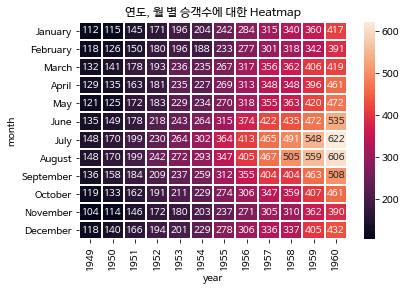

In [24]:
flights_passengers = flights.pivot("month", "year", "passengers") # 2차원 데이터로 변환
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

## catplot

`sns.catplot(x="age", y="sex", hue="survived", row="class", data=data, kind="violin", split=True, height=2, aspect=4)`

* 색상(hue)과 행(row) 등을 동시에 사용해 3개 이상의 카테고리 값에 의한 분포변화를 보여줌

* `catplot`: http://seaborn.pydata.org/generated/seaborn.factorplot.html

Text(0.5, 1.0, '각 클래스의 성별 생존자 수의 Catplot')

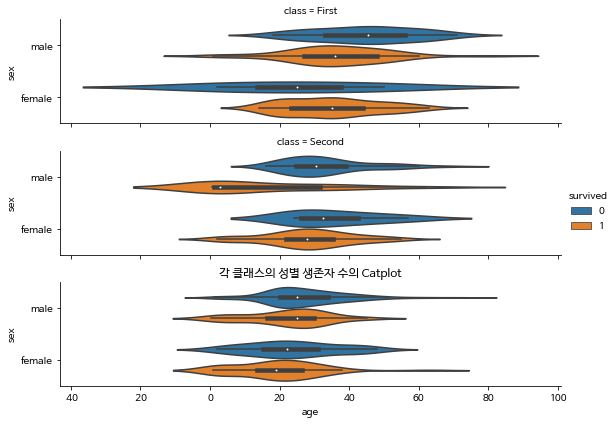

In [24]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x="age", y="sex", hue="survived", row="class", data=data,
            kind="violin", height=2, aspect=4)
plt.title("각 클래스의 성별 생존자 수의 Catplot")
plt.show()

## 시각 효과 제고를 위한 차트 겹치기

`sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)` <br>
`sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")`

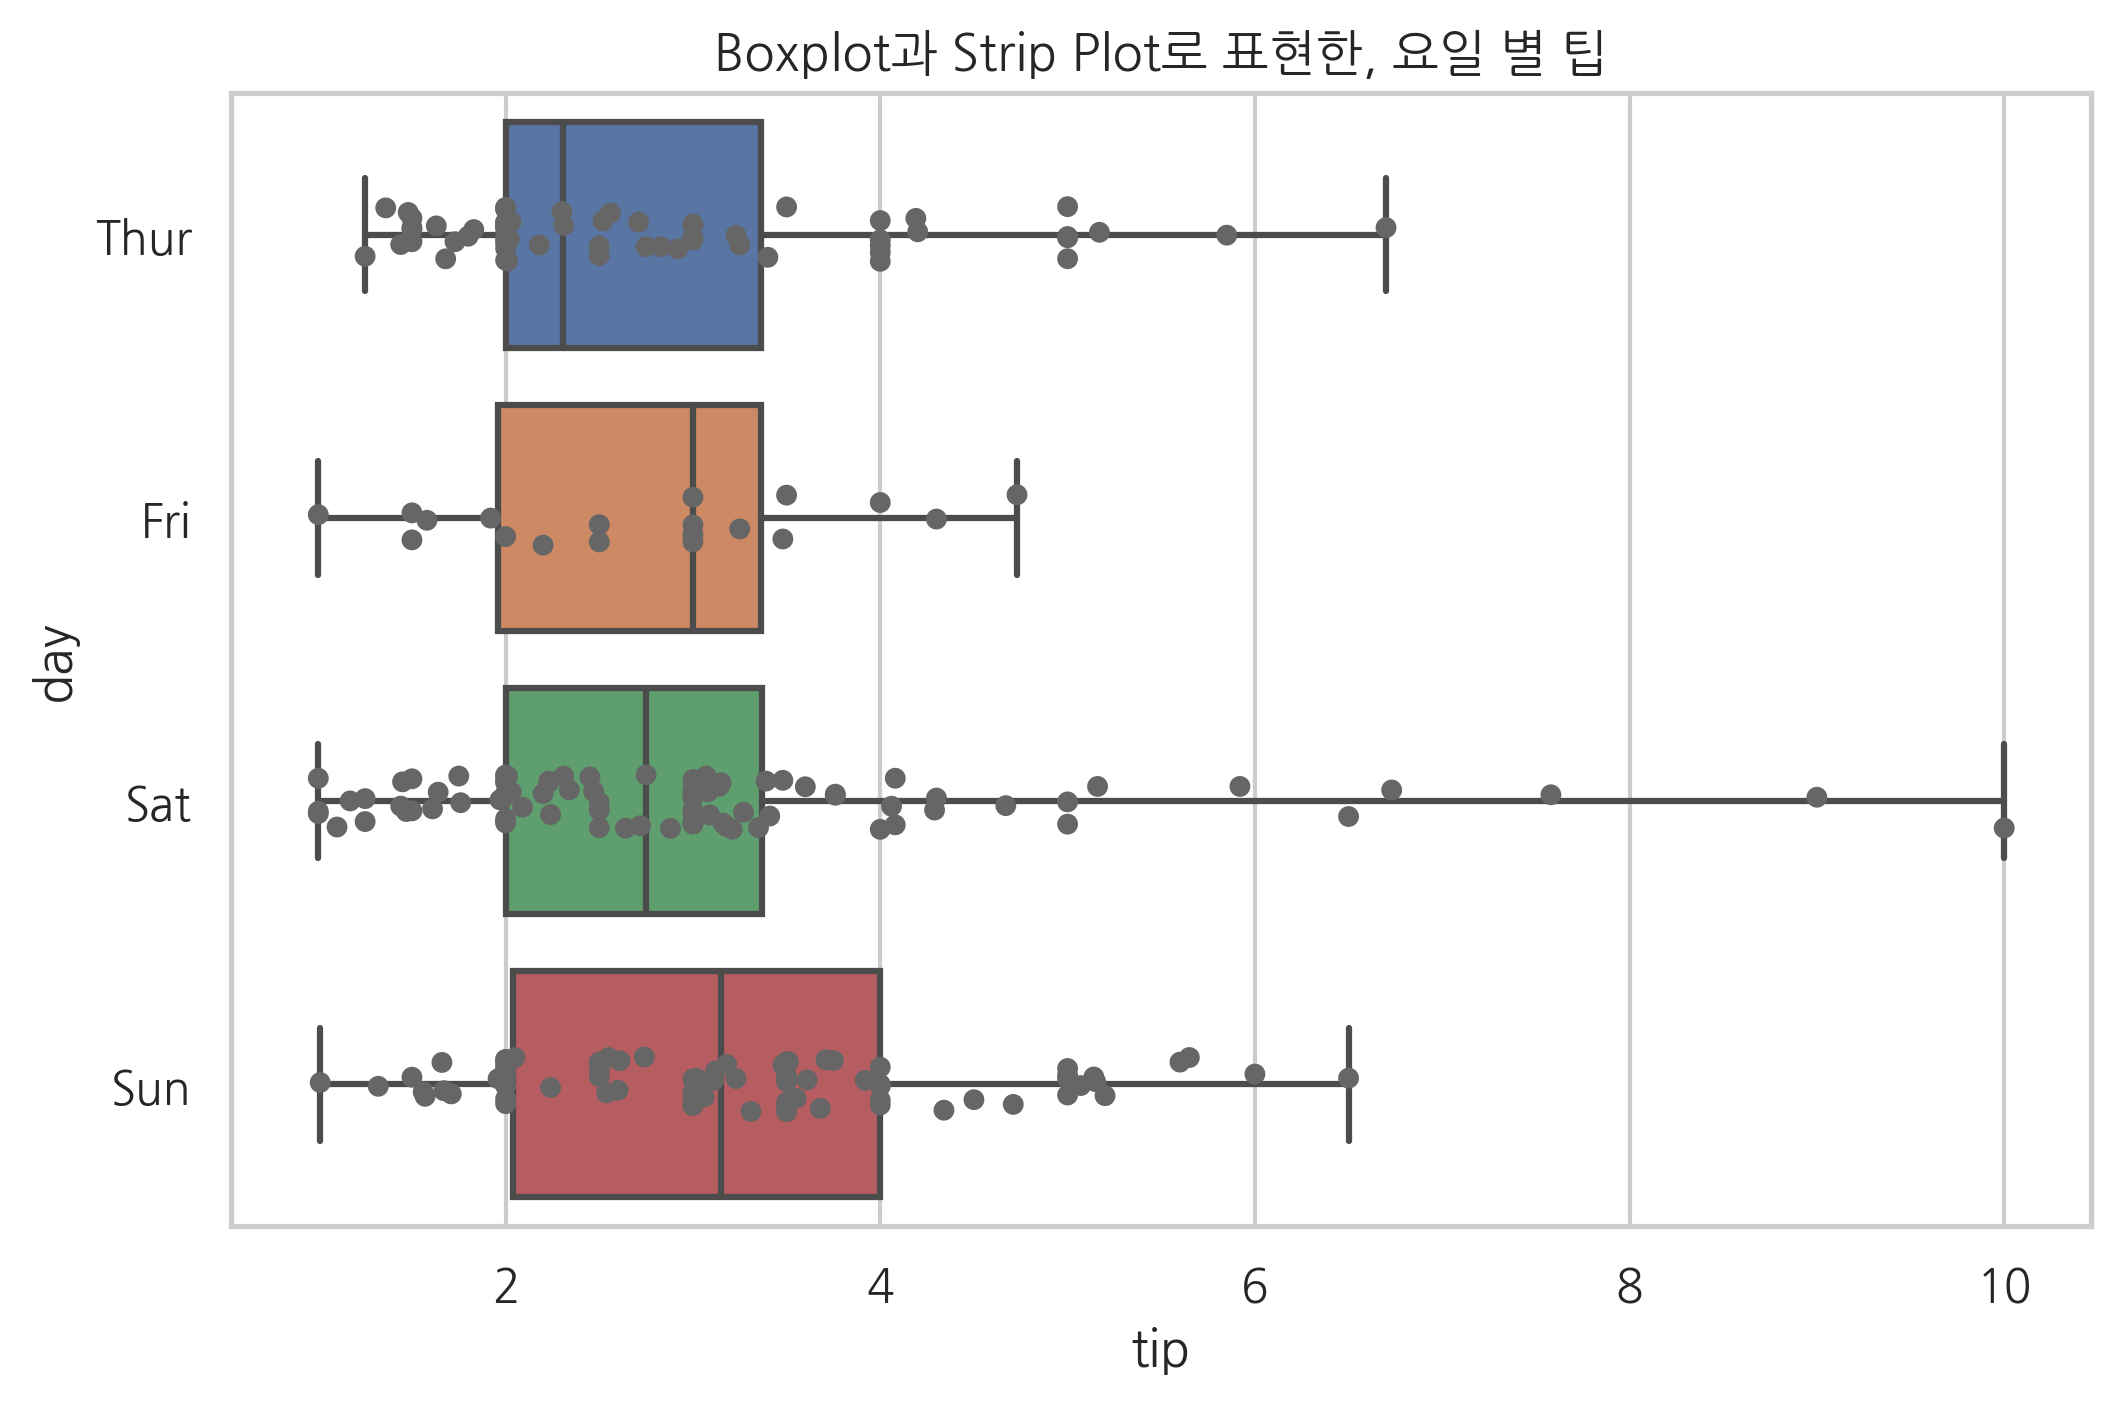

In [33]:
plt.title("Boxplot과 Strip Plot로 표현한, 요일 별 팁")
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")
plt.show()

`sns.violinplot(x="tip", y="day", data=tips, inner=None)` <br>
`sns.swarmplot(x="tip", y="day", data=tips, color="0.9")`

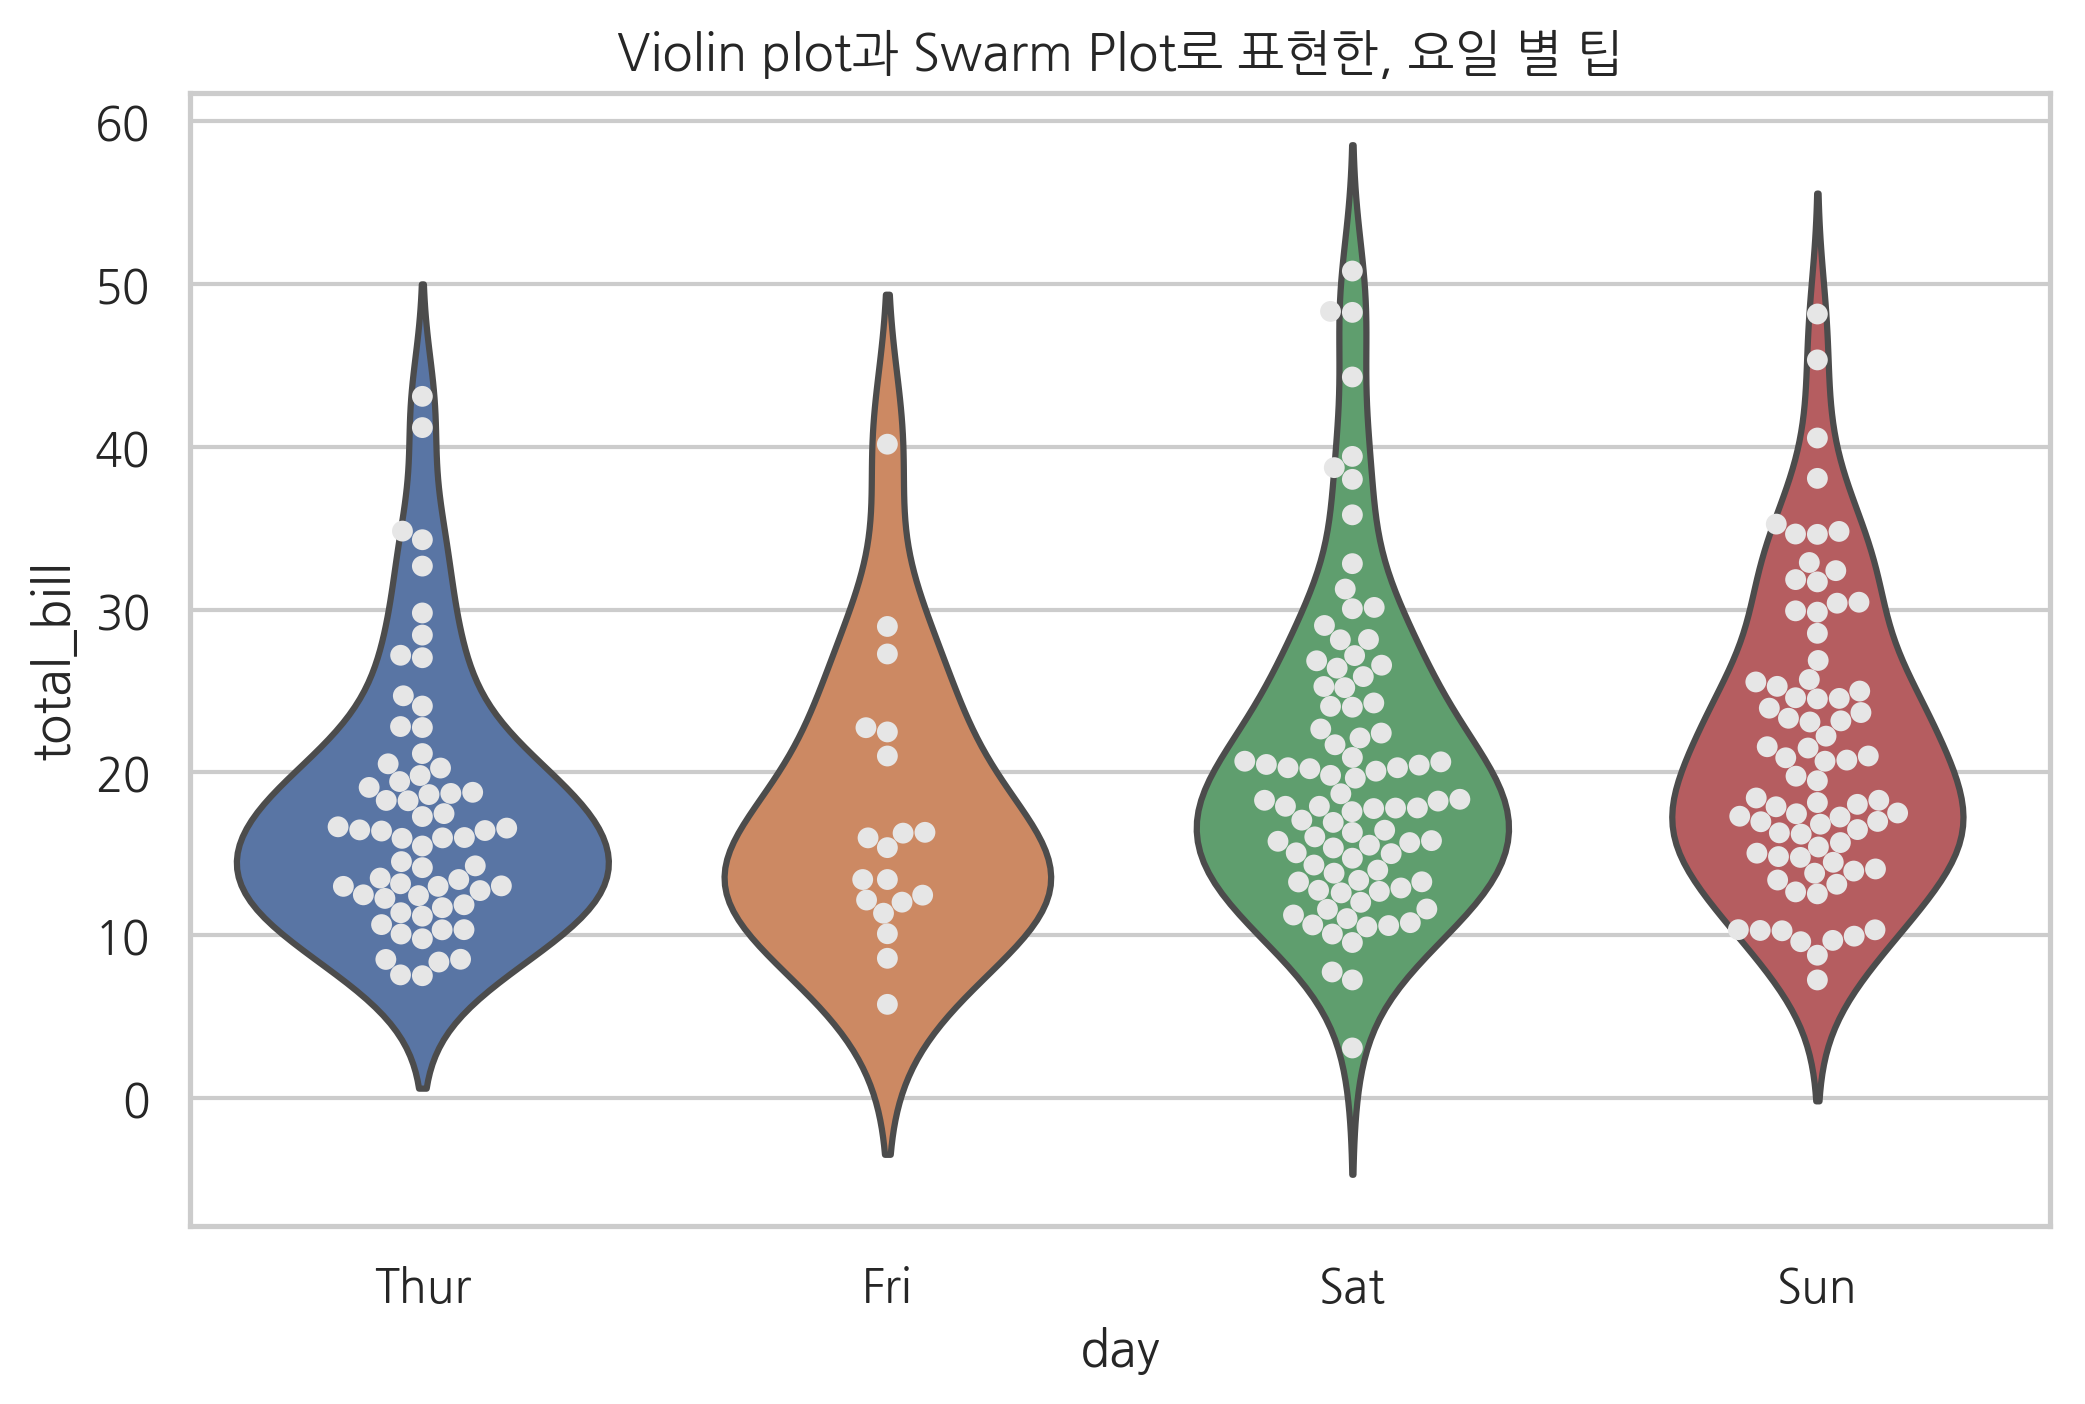

In [34]:
plt.title("Violin plot과 Swarm Plot로 표현한, 요일 별 팁")
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.9")
plt.show()

https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/

## 기타

#### 범주형자료 Series b 에 대한 Series a의 분포<data['a'].hist(by=data['b'],figsize=(,), bin=급간수, color='색인덱스', alpha=투명도)>

In [14]:
data = pd.DataFrame({'a' : np.random.randn(1000), 
                   'b' : np.random.randint(0, 4, 1000)})
data.head()

,a,b
0,-0.165670,3
1,-0.413045,0
2,0.380272,0
3,0.438850,3
4,0.793404,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000130881EAB00>,
      dtype=object)

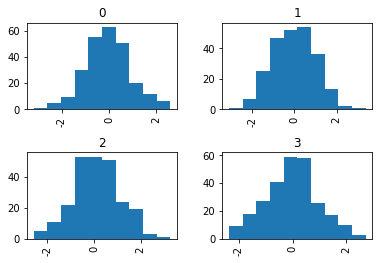

In [15]:
data['a'].hist(by=data['b'],figsize=(6, 4))

#### Seaborn으로 두 개 이상 그래프 작성

In [ ]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot( korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

#### sns.barplot, x축 레이블 기울기, x축 레이블 위치, y축 레이블 지우기

In [ ]:
sns.barplot(x=korea.EmploymentStatus.unique(), 
            y=korea.EmploymentStatus.value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

`sns.FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=True, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, 
subplot_kws=None, gridspec_kws=None, size=None)`

* data : DataFrame

* Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.

* row, col, hue : strings

* Variables that define subsets of the data, which will be drawn on separate facets in the grid. See the *_order parameters to control the order of levels of this variable.

col_wrap : int, optional

“Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.

share{x,y} : bool, ‘col’, or ‘row’ optional

If true, the facets will share y axes across columns and/or x axes across rows.

height : scalar, optional

Height (in inches) of each facet. See also: aspect.

aspect : scalar, optional

Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.

palette : palette name, list, or dict, optional

Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

{row,col,hue}_order : lists, optional

Order for the levels of the faceting variables. By default, this will be the order that the levels appear in data or, if the variables are pandas categoricals, the category order.

hue_kws : dictionary of param -> list of values mapping

Other keyword arguments to insert into the plotting call to let other plot attributes vary across levels of the hue variable (e.g. the markers in a scatterplot).

legend_out : bool, optional

If True, the figure size will be extended, and the legend will be drawn outside the plot on the center right.

despine : boolean, optional

Remove the top and right spines from the plots.

margin_titles : bool, optional

If True, the titles for the row variable are drawn to the right of the last column. This option is experimental and may not work in all cases.

{x, y}lim: tuples, optional

Limits for each of the axes on each facet (only relevant when share{x, y} is True.

subplot_kws : dict, optional

Dictionary of keyword arguments passed to matplotlib subplot(s) methods.

gridspec_kws : dict, optional

Dictionary of keyword arguments passed to matplotlib’s gridspec module (via plt.subplots). Requires matplotlib >= 1.4 and is ignored if col_wrap is not None.



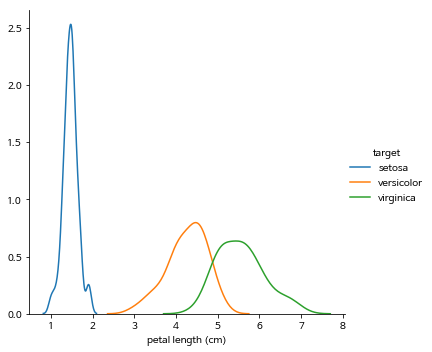

In [11]:
from sklearn.datasets import load_iris
 
Iris = load_iris()
Iris_Data = pd.DataFrame(data= np.c_[Iris['data'], Iris['target']], columns= Iris['feature_names'] + ['target'])
Iris_Data['target'] = Iris_Data['target'].map({0: "setosa", 1: "versicolor", 2: "virginica"})
 
X_Data = Iris_Data.iloc[:,:-1]
Y_Data = Iris_Data.iloc[:,[-1]]

sns.FacetGrid(Iris_Data, hue="target", size=5).map(
    sns.kdeplot, "petal length (cm)").add_legend()

# 출처: https://computer-nerd.tistory.com/53

In [8]:
dataset = pd.read_csv(
"C:/Users/Gumin Jung/OneDrive - 서울시립대학교/jupyter_notebook/PowerQuery&PowerBI/sample.csv/sample_sales.csv", 
                     engine="python")

In [27]:
# Initialize the FacetGrid object
sns.set(style="white", rc={"axes.facecolor": (0,0,0,0)})
sns.FacetGrid(dataset, row="COUNTRY", hue="COUNTRY", aspect=30, height=.5, palette=sns.color_palette("BuGn_r"))

# Draw the densities in a few steps
g.map(sns.kdeplot, "SALES", clip_on=False, shade=True, alpha=1, lw=1.5, bw=2)
g.map(sns.kdeplot, "SALES", clip_on=False, shade=True, alpha=1, lw=1.5, bw=2
# g.map(plt.axhline, y=0, lw=2, clip_on=False)

# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .05, label, fontweight="bold", color="#444444",
#         ha="left", va="center", transform=ax.transAxes)

# g.map(label, "Sales")

# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.9)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)

# g.savefig('output.png')

SyntaxError: invalid syntax (<ipython-input-27-7979cfbf1be3>, line 8)